In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data = train_data - train_data.mean(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = train_data / train_data.std()

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - test_data.mean(axis=0)
test_data = test_data / test_data.std()

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, input_shape=(train_data.shape[1],), kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(16, kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='he_uniform'))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2)

earlystopping_cb = callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_data, train_labels, epochs=300, validation_data=(val_data, val_labels), callbacks=[earlystopping_cb])

Epoch 1/300
11/11 [==============================] - 1s 16ms/step - loss: 582.9817 - mae: 22.0232 - val_loss: 518.6151 - val_mae: 21.5655
Epoch 2/300
11/11 [==============================] - 0s 4ms/step - loss: 550.6076 - mae: 21.2470 - val_loss: 493.2831 - val_mae: 20.9498
Epoch 3/300
11/11 [==============================] - 0s 4ms/step - loss: 523.2897 - mae: 20.5656 - val_loss: 470.2950 - val_mae: 20.3682
Epoch 4/300
11/11 [==============================] - 0s 4ms/step - loss: 497.3554 - mae: 19.8860 - val_loss: 446.2873 - val_mae: 19.7404
Epoch 5/300
11/11 [==============================] - 0s 4ms/step - loss: 470.0192 - mae: 19.1354 - val_loss: 419.2213 - val_mae: 19.0141
Epoch 6/300
11/11 [==============================] - 0s 4ms/step - loss: 438.9256 - mae: 18.2845 - val_loss: 388.5239 - val_mae: 18.1584
Epoch 7/300
11/11 [==============================] - 0s 4ms/step - loss: 403.8783 - mae: 17.3405 - val_loss: 354.4657 - val_mae: 17.1424
Epoch 8/300
11/11 [=====================

Epoch 62/300
11/11 [==============================] - 0s 4ms/step - loss: 57.8170 - mae: 5.3240 - val_loss: 36.1068 - val_mae: 4.2806
Epoch 63/300
11/11 [==============================] - 0s 4ms/step - loss: 57.1131 - mae: 5.2555 - val_loss: 36.0222 - val_mae: 4.2918
Epoch 64/300
11/11 [==============================] - 0s 4ms/step - loss: 56.7459 - mae: 5.2397 - val_loss: 35.5451 - val_mae: 4.3251
Epoch 65/300
11/11 [==============================] - 0s 4ms/step - loss: 55.9687 - mae: 5.2158 - val_loss: 34.7648 - val_mae: 4.2613
Epoch 66/300
11/11 [==============================] - 0s 4ms/step - loss: 55.2274 - mae: 5.1550 - val_loss: 34.5113 - val_mae: 4.2499
Epoch 67/300
11/11 [==============================] - 0s 4ms/step - loss: 54.6383 - mae: 5.1101 - val_loss: 34.0029 - val_mae: 4.2253
Epoch 68/300
11/11 [==============================] - 0s 4ms/step - loss: 54.1069 - mae: 5.0553 - val_loss: 33.6262 - val_mae: 4.1826
Epoch 69/300
11/11 [==============================] - 0s 4ms/s

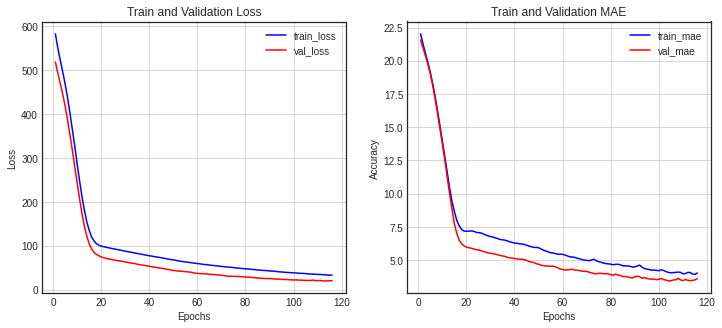

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 36.4431 - mae: 4.2679


[36.443111419677734, 4.267859935760498]